In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from pandas import Series, DataFrame

In [34]:
df =pd.read_csv("sonar.all-data",sep=",",header= None)

In [35]:
df.shape

(208, 61)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [6]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [7]:
df.duplicated().sum()

0

In [8]:
X=df.iloc[:, :-1]
X.shape

(208, 60)

In [9]:
y=df.iloc[:,-1]
type(y.shape)
y.head()

0    R
1    R
2    R
3    R
4    R
Name: 60, dtype: object

In [10]:
y.value_counts()

M    111
R     97
Name: 60, dtype: int64

In [11]:
lst1=[]
for i in range(len(y)):
    if y[i]=="M": 
       lst1.append(0)
    else:
       lst1.append(1) 

In [12]:
Y = Series(lst1)

In [13]:
Y.head()

0    1
1    1
2    1
3    1
4    1
dtype: int64

In [14]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=4)
print("size of x_train",x_train.shape)
print("size of x_tets",x_test.shape)
print("size of y_train",y_train.shape)
print("size of y_test",y_test.shape)

size of x_train (166, 60)
size of x_tets (42, 60)
size of y_train (166,)
size of y_test (42,)


# Logistic Regression


In [15]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)

/home/sachin/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
y_predict=logreg.predict(x_test)

In [17]:
y_predict

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0])

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm

array([[22,  3],
       [ 5, 12]])

In [19]:
accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
precision = cm[0][0]/(cm[0][0]+cm[0][1])
recall = cm[0][0]/(cm[0][0]+cm[1][0])
print("Accuracy: ",accuracy)
print("Precision: ",precision)
print("Recall :",recall)

Accuracy:  0.8095238095238095
Precision:  0.88
Recall : 0.8148148148148148


In [36]:
y_probability=logreg.predict_proba(x_test)
#y_probability

In [21]:
prob_0=list()
for i in range(len(y_probability)):
    prob_0.append(y_probability[i][0])
#prob_0

/home/sachin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'upperleft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


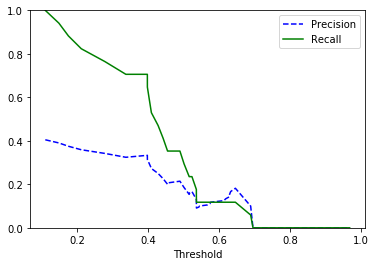

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds =precision_recall_curve(y_test,prob_0)
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],"b--",label="Precision")
    plt.plot(thresholds,recalls[:-1],"g-",label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upperleft")
    plt.ylim([0,1])

plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

In [32]:
p_r_1_output=list()
for i in range(len(prob_0)):
    if prob_0[i]>0.45:
        p_r_1_output.append(0)
    else:
        p_r_1_output.append(1)
confusion_matrix(y_test,p_r_1_output)  

array([[24,  1],
       [ 6, 11]])

# SVM

In [19]:
svc=SVC(kernel="linear",random_state=0)
svc.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [20]:
svc_pred=svc.predict(x_test)

In [21]:
cm= confusion_matrix(y_test, svc_pred)
cm

array([[24,  1],
       [ 6, 11]])

In [22]:
accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
precision = cm[0][0]/(cm[0][0]+cm[0][1])
recall = cm[0][0]/(cm[0][0]+cm[1][0])
print("Accuracy: ",accuracy)
print("Precision: ",precision)
print("Recall :",recall)

Accuracy:  0.8333333333333334
Precision:  0.96
Recall : 0.8


# DECISION TREE


In [23]:
d_tree=DecisionTreeClassifier(criterion="gini",random_state=0)
d_tree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [24]:
d_tree_predict=d_tree.predict(x_test)

In [25]:
cm=confusion_matrix(y_test,d_tree_predict)

In [26]:
accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
precision = cm[0][0]/(cm[0][0]+cm[0][1])
recall = cm[0][0]/(cm[0][0]+cm[1][0])
print("Accuracy: ",accuracy)
print("Precision: ",precision)
print("Recall :",recall)

Accuracy:  0.7142857142857143
Precision:  0.72
Recall : 0.782608695652174


# RANDOM FOREST CLASSIFIER

In [30]:
rf=RandomForestClassifier(n_estimators=100,max_features=25,min_samples_split=15,max_depth=8)
rf.fit(x_train,y_train)
rf_predict=rf.predict(x_test)

In [31]:
rf_predict

array([0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [32]:
cm=confusion_matrix(y_test,rf_predict)
accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
precision = cm[0][0]/(cm[0][0]+cm[0][1])
recall = cm[0][0]/(cm[0][0]+cm[1][0])
print("Accuracy: ",accuracy)
print("Precision: ",precision)
print("Recall :",recall)


Accuracy:  0.8333333333333334
Precision:  0.92
Recall : 0.8214285714285714


# PARAMETER TUNING ON RANDOM FOREST

In [33]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
#number of trees in random forest
n_estimators=[10,20,30,40,50,60,70,80,90]
#number of features in random forest
max_features=["auto","sqrt"]
#maximum depth
max_depth=[4,6,8,10]
#min number of samples required for split
min_samples_split=[5,8,10,12]
#min number of samples required as each leaf node
min_samples_leaf=[2,3,4,5,6]
# method of selecting samples for training each tree
bootstrap = [True, False]

param_grid={"n_estimators":n_estimators,"max_depth":max_depth,"max_features":max_features,"min_samples_leaf":min_samples_leaf,"min_samples_split":min_samples_split,"bootstrap":bootstrap}

In [34]:
print(param_grid)
rf=RandomForestClassifier(random_state=5)


{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90], 'max_depth': [4, 6, 8, 10], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [2, 3, 4, 5, 6], 'min_samples_split': [5, 8, 10, 12], 'bootstrap': [True, False]}


In [36]:
rf_t=RandomizedSearchCV(estimator=rf,param_distributions=param_grid,cv=5, n_iter=100)

In [37]:
rf_t.fit(x_train,y_train)

/home/sachin/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [38]:
best_params=rf_t.best_params_

{'n_estimators': 40,
 'min_samples_split': 8,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 6,
 'bootstrap': False}

In [44]:
rf_best= RandomForestClassifier(n_estimators= 40,
 min_samples_split= 8,
 min_samples_leaf= 2,
 max_features="auto",
 max_depth= 6,
 bootstrap=False)

In [45]:
rf_best.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [48]:
rfb_predict=rf_best.predict(x_test)

In [50]:
cm=confusion_matrix(y_test,rfb_predict)
accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
precision = cm[0][0]/(cm[0][0]+cm[0][1])
recall = cm[0][0]/(cm[0][0]+cm[1][0])
print("Accuracy: ",accuracy)
print("Precision: ",precision)
print("Recall :",recall)


Accuracy:  0.8809523809523809
Precision:  0.96
Recall : 0.8571428571428571


# Parameter Tuning in SVM

In [56]:
#type of kernel in svm
kernel=["linear","poly","rbf"]
# margin of the classifier
c=[1,10,50,100]
gamma=[0.001,0.01,1,5]


In [66]:
parameters_grid={"kernel":kernel,"gamma":gamma,"C":c}

In [67]:
Svc=SVC()
svc_random = RandomizedSearchCV(estimator=Svc,param_distributions=parameters_grid,cv=5)

In [68]:
svc_random.fit(x_train,y_train)

/home/sachin/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=SVC(C=1.0, cache_size=200, class_weight=None,
                                 coef0=0.0, decision_function_shape='ovr',
                                 degree=3, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, probability=False,
                                 random_state=None, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'C': [1, 10, 50, 100],
                                        'gamma': [0.001, 0.01, 1, 5],
                                        'kernel': ['linear', 'poly', 'rbf']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [69]:
#best parameters
svc_random.best_params_

{'kernel': 'rbf', 'gamma': 1, 'C': 10}

In [71]:
svc_best=SVC(kernel="rbf",gamma=1,C=10)

In [72]:
svc_best.fit(x_train,y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [74]:
svc_best_predict=svc_best.predict(x_test)
svc_best_predict

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0])

In [75]:
cm=confusion_matrix(y_test,svc_best_predict)

In [76]:
cm=confusion_matrix(y_test,svc_best_predict)
accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
precision = cm[0][0]/(cm[0][0]+cm[0][1])
recall = cm[0][0]/(cm[0][0]+cm[1][0])
print("Accuracy: ",accuracy)
print("Precision: ",precision)
print("Recall :",recall)


Accuracy:  0.8571428571428571
Precision:  0.92
Recall : 0.8518518518518519


# Tuning in decision tree

In [77]:
dc=DecisionTreeClassifier()
#maximum depth
max_depth=[4,6,8,10]
#min number of samples required for split
min_samples_split=[5,8,10,12]
#min number of samples required as each leaf node
min_samples_leaf=[2,3,4,5,6]

In [79]:
param_grid_dc={"max_depth":max_depth,"min_samples_split":min_samples_split,"min_samples_leaf":min_samples_leaf}

In [80]:
dc_random=RandomizedSearchCV(estimator=dc,param_distributions=param_grid_dc,cv=5)

In [81]:
dc_random.fit(x_train,y_train)

/home/sachin/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=None,
                                                    splitter='best')

In [82]:
dc_random.best_params_

{'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 4}

In [84]:
dc_best=DecisionTreeClassifier(min_samples_split=5,min_samples_leaf=4,max_depth=4)
dc_best.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [86]:
dc_predict=dc_best.predict(x_test)
dc_predict

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0])

In [87]:
cm=confusion_matrix(y_test,dc_predict)

In [88]:
accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
precision = cm[0][0]/(cm[0][0]+cm[0][1])
recall = cm[0][0]/(cm[0][0]+cm[1][0])
print("Accuracy: ",accuracy)
print("Precision: ",precision)
print("Recall :",recall)


Accuracy:  0.8095238095238095
Precision:  0.88
Recall : 0.8148148148148148
